In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('result.csv')
df

,OP_CARRIER,ARR_ESTIMATED,ORIGIN,DEP_TIME,DEST,Predicted_ARR_DELAY
0,DL,25-11-2023 07:20,CPT,24-11-2023 16:50,ATL,-4.86
1,AF,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,14.97
2,AM,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,19.06
3,DL,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,9.45
4,KE,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,9.45
...,...,...,...,...,...,...
3095,DL,24-11-2023 23:58,LIH,NaN,HNL,131.19
3096,HA,24-11-2023 23:58,LIH,NaN,HNL,131.19
3097,JL,24-11-2023 23:58,LIH,NaN,HNL,131.19
3098,KE,24-11-2023 23:58,LIH,NaN,HNL,131.19


In [4]:
delayed = df[df['Predicted_ARR_DELAY'] > 0]
delayed

,OP_CARRIER,ARR_ESTIMATED,ORIGIN,DEP_TIME,DEST,Predicted_ARR_DELAY
1,AF,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,14.97
2,AM,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,19.06
3,DL,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,9.45
4,KE,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,9.45
5,KL,25-11-2023 01:32,MEX,24-11-2023 21:30,ATL,9.45
...,...,...,...,...,...,...
3095,DL,24-11-2023 23:58,LIH,NaN,HNL,131.19
3096,HA,24-11-2023 23:58,LIH,NaN,HNL,131.19
3097,JL,24-11-2023 23:58,LIH,NaN,HNL,131.19
3098,KE,24-11-2023 23:58,LIH,NaN,HNL,131.19


In [5]:
df.groupby('DEST').size().reset_index(name = 'flights')

,DEST,flights
0,ATL,100
1,AUS,100
2,BNA,100
3,BOS,100
4,BWI,100
5,CLT,100
6,DCA,100
7,DEN,100
8,DFW,100
9,DTW,100


In [6]:
delayed10 = delayed.groupby('DEST')['Predicted_ARR_DELAY'].sum().reset_index(name = 'total_time').sort_values('total_time', ascending = False).head(10)
delayed10

,DEST,total_time
4,BWI,12816.976310
20,MDW,12658.203167
2,BNA,11038.608786
1,AUS,11016.025000
24,PHL,10793.970667
30,TPA,9647.646000
11,FLL,8598.445167
18,LGA,8287.938833
16,LAS,8153.048190
26,SAN,8125.896333


Text(0, 0.5, 'Time Delayed')

<Figure size 1080x720 with 0 Axes>

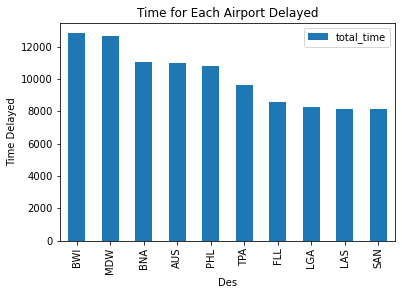

In [7]:
plt.figure(figsize=(15, 10))

delayed10.plot(x = 'DEST', kind='bar')

plt.title('Time for Each Airport Delayed')
plt.xlabel('Des')
plt.ylabel('Time Delayed')

In [8]:
good10 = delayed.groupby('DEST')['Predicted_ARR_DELAY'].sum().reset_index(name = 'total_time').sort_values('total_time', ascending = True).head(10)
good10

,DEST,total_time
23,ORD,2135.041667
17,LAX,3171.026667
28,SFO,3619.079167
0,ATL,3685.590000
3,BOS,4000.845000
15,JFK,4269.887500
27,SEA,4429.325333
8,DFW,4714.230000
10,EWR,4767.206667
25,PHX,5251.130833


Text(0, 0.5, 'Time Delayed')

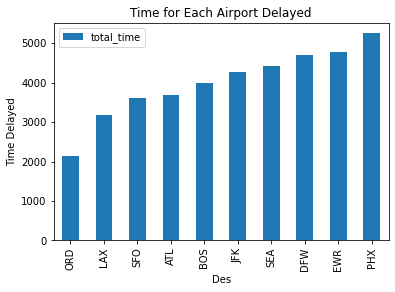

In [9]:
good10.plot(x = 'DEST', kind='bar')

plt.title('Time for Each Airport Delayed')
plt.xlabel('Des')
plt.ylabel('Time Delayed')

In [10]:
#Take a look at BWI
BWI = df[df['DEST'] == 'BWI']
BWI

,OP_CARRIER,ARR_ESTIMATED,ORIGIN,DEP_TIME,DEST,Predicted_ARR_DELAY
2400,WN,24-11-2023 22:27,ORF,24-11-2023 21:39,BWI,2.51000
2401,NaN,NaN,SSI,24-11-2023 21:55,BWI,21.33369
2402,WN,24-11-2023 22:59,BDL,24-11-2023 21:55,BWI,101.32000
2403,NK,25-11-2023 00:08,MCO,24-11-2023 21:56,BWI,17.99000
2404,AF,24-11-2023 23:42,ATL,24-11-2023 21:57,BWI,128.33000
...,...,...,...,...,...,...
2495,WN,NaN,MIA,NaN,BWI,134.60000
2496,WN,NaN,AUS,25-11-2023 01:59,BWI,174.41000
2497,WN,NaN,ORD,NaN,BWI,134.60000
2498,WN,25-11-2023 04:07,ATL,25-11-2023 02:07,BWI,173.23000


In [11]:
BWI = BWI.dropna(subset=['OP_CARRIER'])
BWI

,OP_CARRIER,ARR_ESTIMATED,ORIGIN,DEP_TIME,DEST,Predicted_ARR_DELAY
2400,WN,24-11-2023 22:27,ORF,24-11-2023 21:39,BWI,2.51
2402,WN,24-11-2023 22:59,BDL,24-11-2023 21:55,BWI,101.32
2403,NK,25-11-2023 00:08,MCO,24-11-2023 21:56,BWI,17.99
2404,AF,24-11-2023 23:42,ATL,24-11-2023 21:57,BWI,128.33
2405,DL,24-11-2023 23:42,ATL,24-11-2023 21:57,BWI,148.75
...,...,...,...,...,...,...
2495,WN,NaN,MIA,NaN,BWI,134.60
2496,WN,NaN,AUS,25-11-2023 01:59,BWI,174.41
2497,WN,NaN,ORD,NaN,BWI,134.60
2498,WN,25-11-2023 04:07,ATL,25-11-2023 02:07,BWI,173.23


In [12]:
carriers = BWI.groupby('OP_CARRIER')['Predicted_ARR_DELAY'].sum().reset_index().sort_values('Predicted_ARR_DELAY', ascending = False)
carriers

,OP_CARRIER,Predicted_ARR_DELAY
25,WN,7764.639000
10,F9,649.640000
17,NK,488.627500
14,KL,283.190000
9,DL,283.190000
3,AA,259.830000
7,B6,250.300000
23,UA,224.180000
18,NZ,224.180000
16,MH,173.180000


In [13]:
top_carriers = carriers.sort_values('Predicted_ARR_DELAY', ascending=False).head(5)
other_carriers_sum = carriers[carriers['OP_CARRIER'].isin(top_carriers['OP_CARRIER'])]['Predicted_ARR_DELAY'].sum()

In [14]:
other_carriers_sum

9469.286500000002

In [15]:
top_carriers = top_carriers.append({'OP_CARRIER': 'Others', 'Predicted_ARR_DELAY': other_carriers_sum}, ignore_index=True)

In [16]:
top_carriers

,OP_CARRIER,Predicted_ARR_DELAY
0,WN,7764.6390
1,F9,649.6400
2,NK,488.6275
3,KL,283.1900
4,DL,283.1900
5,Others,9469.2865


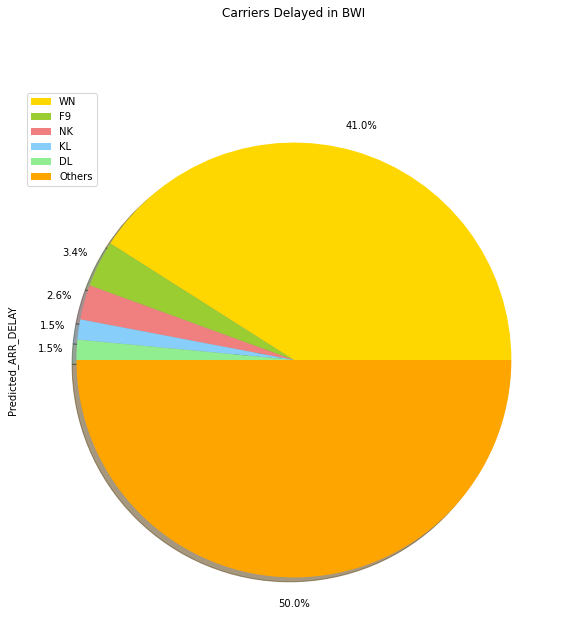

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']


top_carriers['Predicted_ARR_DELAY'].plot(kind = 'pie',
         figsize = (20, 10),
         autopct='%1.1f%%',
         shadow=True,
         labels=None, 
          pctdistance=1.12, 
          colors=colors_list)

plt.title('Carriers Delayed in BWI', y = 1.12)
plt.legend(labels=top_carriers['OP_CARRIER'], loc='upper left') 


In [18]:
airports = delayed.groupby('DEST')['Predicted_ARR_DELAY'].sum().reset_index(name = 'total_time').sort_values('total_time', ascending = False)
airports

,DEST,total_time
4,BWI,12816.976310
20,MDW,12658.203167
2,BNA,11038.608786
1,AUS,11016.025000
24,PHL,10793.970667
30,TPA,9647.646000
11,FLL,8598.445167
18,LGA,8287.938833
16,LAS,8153.048190
26,SAN,8125.896333


Text(0, 0.5, 'Density')

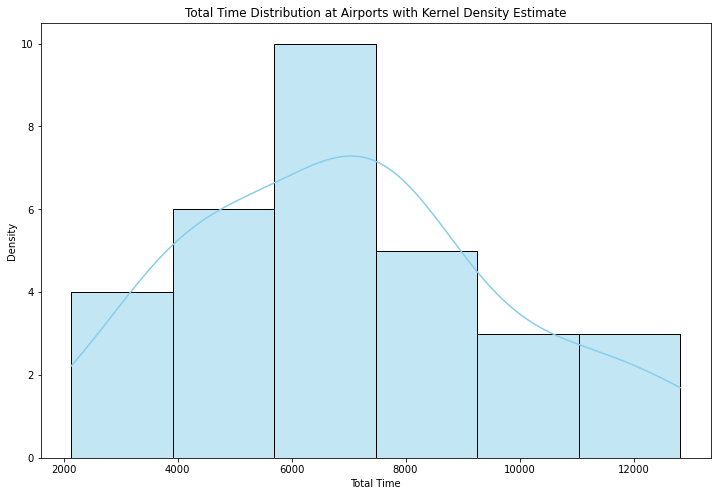

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(airports['total_time'], kde=True, color='skyblue')
plt.title('Total Time Distribution at Airports with Kernel Density Estimate')
plt.xlabel('Total Time')
plt.ylabel('Density')

In [22]:
# Look at delay/flight to see the worst flights 
result = df.groupby('OP_CARRIER').agg({'OP_CARRIER': 'count', 'Predicted_ARR_DELAY':'sum'})
result = result[result['OP_CARRIER'] >= 10]
result['delay/flight'] = result['Predicted_ARR_DELAY'] / result['OP_CARRIER']
result = result.sort_values('delay/flight', ascending = False).head(20)

Text(0, 0.5, 'Times')

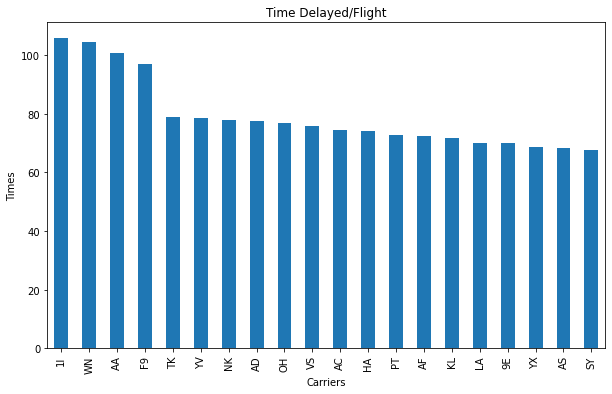

In [23]:
result['delay/flight'].plot(kind = 'bar', figsize=(10, 6))
plt.title('Time Delayed/Flight')
plt.xlabel('Carriers')
plt.ylabel('Times')

In [24]:
# Look at distribution of carriers in BWI
most = BWI.groupby('OP_CARRIER').size().reset_index(name = 'num').sort_values('num', ascending = False).head(10)
most

,OP_CARRIER,num
25,WN,51
17,NK,6
10,F9,4
14,KL,3
9,DL,3
26,WS,2
4,AF,2
24,VS,2
23,UA,2
7,B6,2


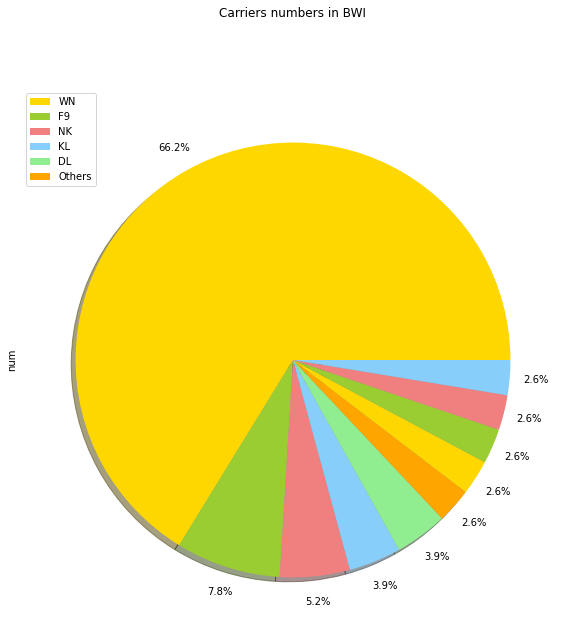

In [25]:
most['num'].plot(kind = 'pie',
         figsize = (20, 10),
         autopct='%1.1f%%',
         shadow=True,
         labels=None, 
          pctdistance=1.12, 
          colors=colors_list)
plt.title('Carriers numbers in BWI', y = 1.12)
plt.legend(labels=top_carriers['OP_CARRIER'], loc='upper left') 